In [37]:
import matplotlib.pyplot as plt
%matplotlib nbagg
from sklearn import cluster
from sklearn import datasets

In [38]:
# iris 데이터 로드 
iris=datasets.load_iris()

In [39]:
data=iris['data']

In [40]:
#data

In [41]:
#학습 -> cluster 생성 
model= cluster.KMeans(n_clusters=3)

In [42]:
model.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [43]:
labels=model.labels_

In [44]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [45]:
# 그래프 그리기 
markers=['o','^','*','v','+','x','d','p','s','1','2']
# 지정된 인덱스의 속성값으로산포도를 작성하는 함수 
def scatter_by_features(feat_idx1,feat_idx2):
    for lbl in range(labels.max()+1):
        clustered = data[labels==lbl]
        plt.scatter(clustered[:,feat_idx1],clustered[:,feat_idx2],c='black',alpha=0.3
                   ,s=100,marker=markers[lbl],label='label {}'.format(lbl))
    plt.xlabel(iris["feature_names"][feat_idx1],fontsize="xx-large")
    plt.ylabel(iris["feature_names"][feat_idx2],fontsize="xx-large")

<IPython.core.display.Javascript object>


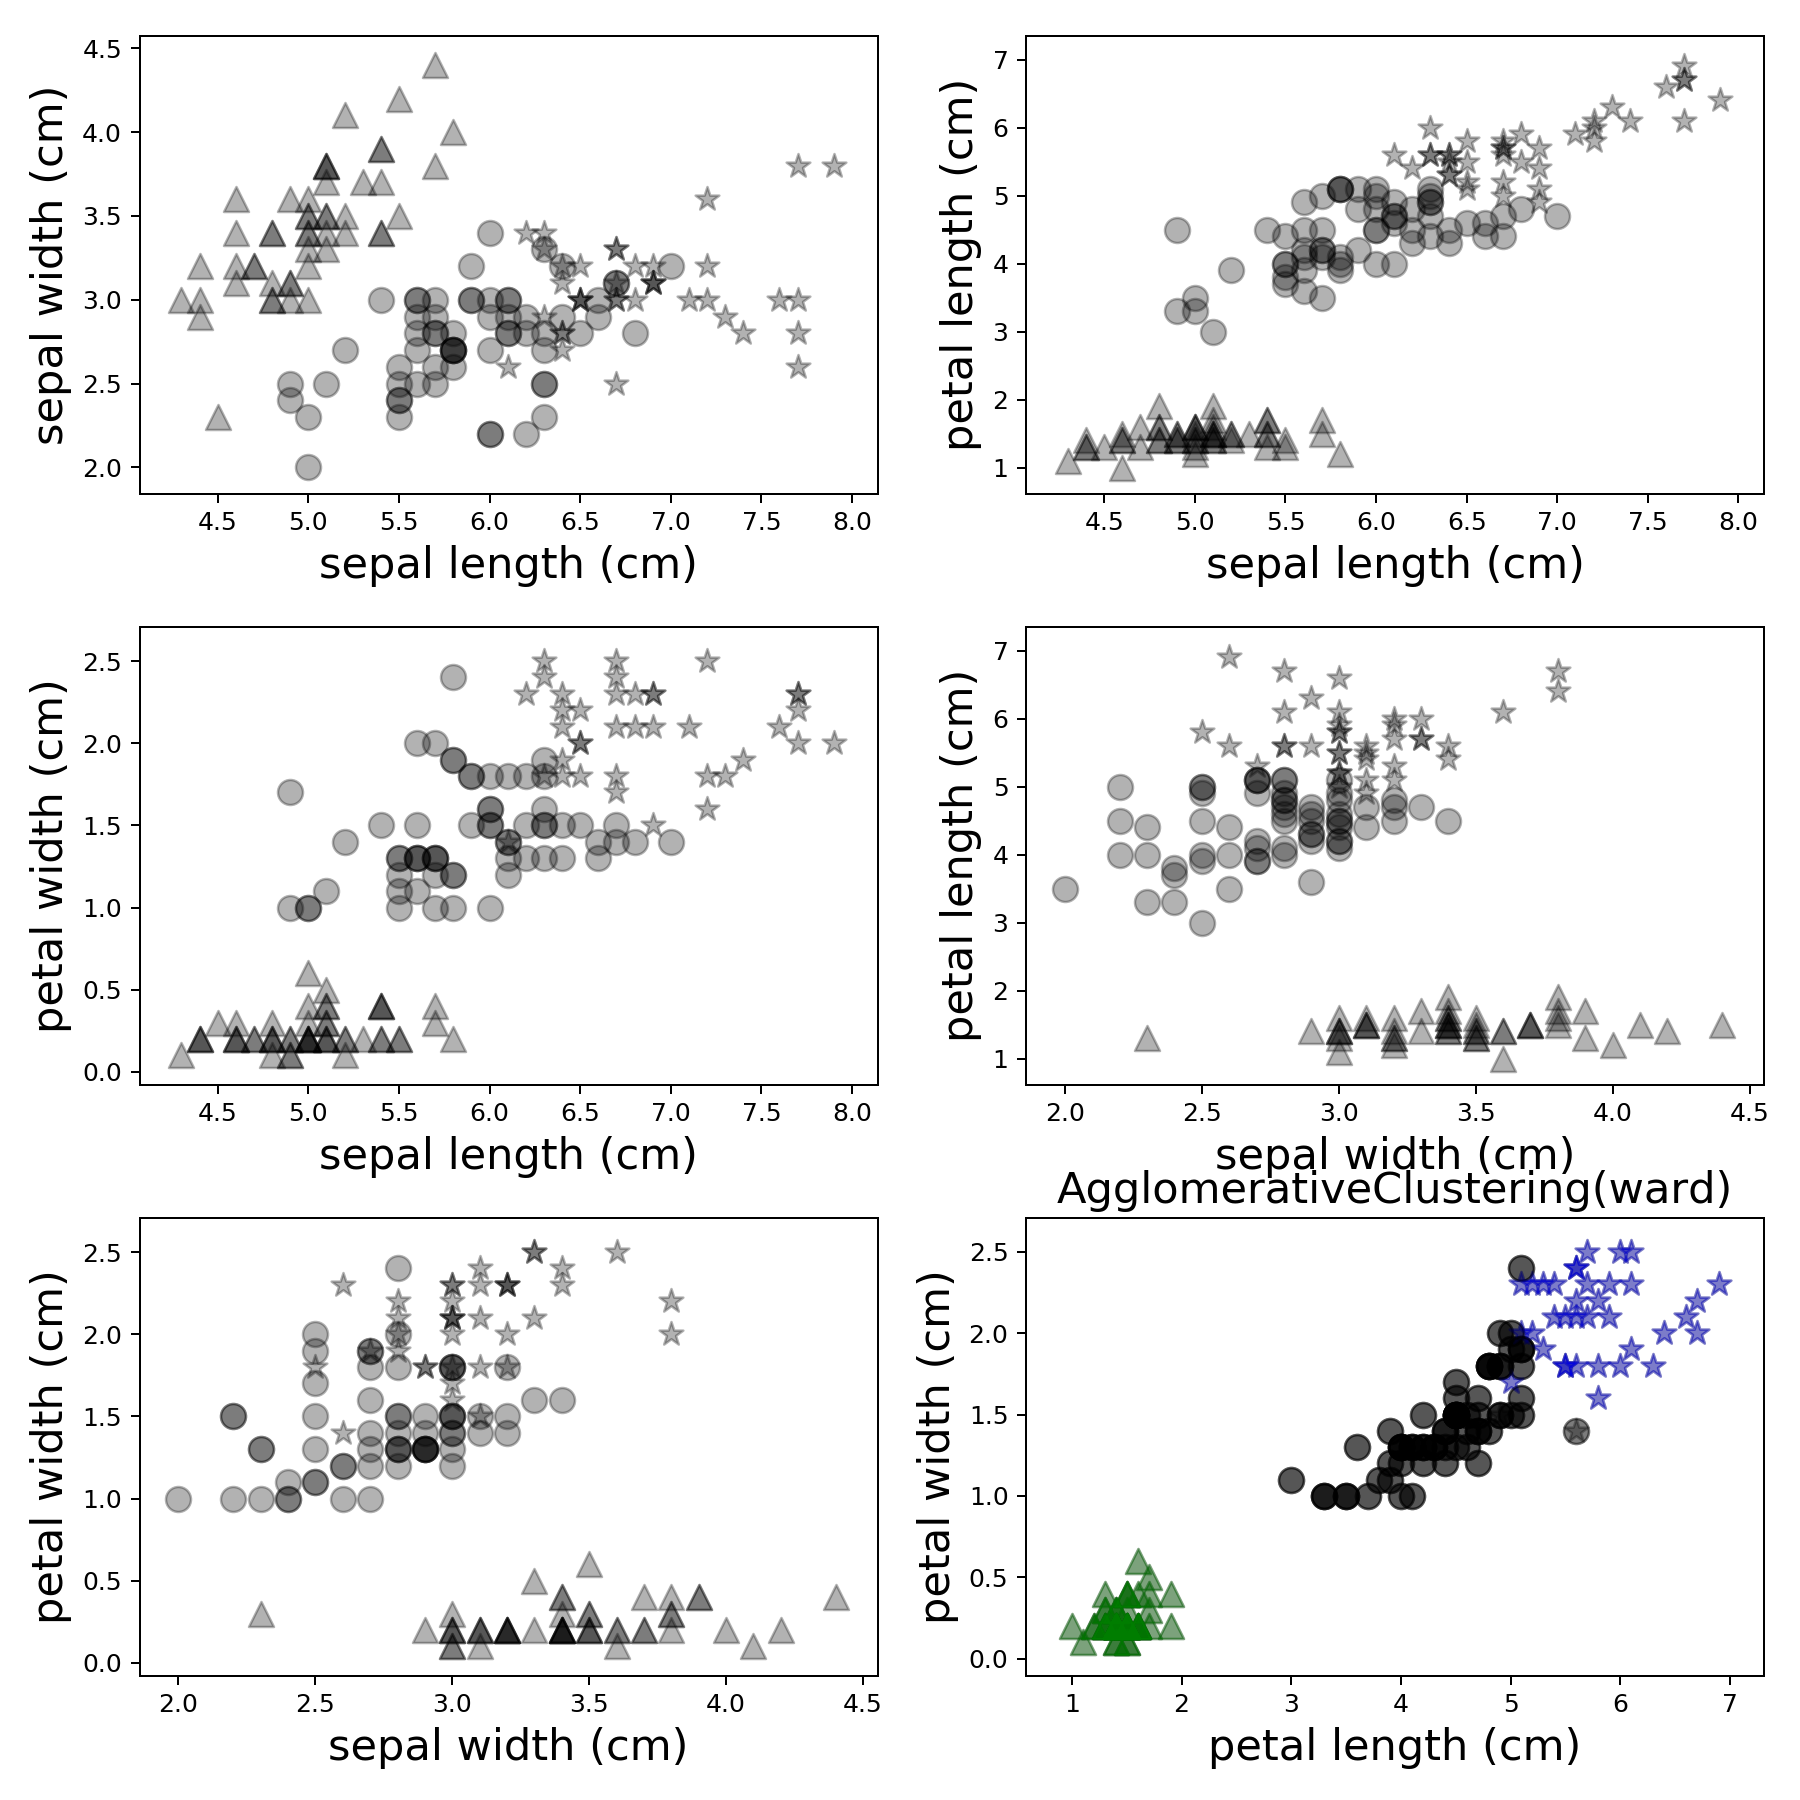

In [46]:
plt.figure(figsize=(10,10))
#feature "sepal length , sepal width"
plt.subplot(3,2,1)
scatter_by_features(0,1)

#"sepal length ", "petal length"
plt.subplot(3,2,2)
scatter_by_features(0,2)

#"sepal length", ""petal width"
plt.subplot(3,2,3)
scatter_by_features(0,3)

# "sepal width", "petal length"
plt.subplot(3,2,4)
scatter_by_features(1,2)

# "sepal width", "petal width"
plt.subplot(3,2,5)
scatter_by_features(1,3)

# "petal length", "petal width "
plt.subplot(3,2,6)
scatter_by_features(2,3)

plt.tight_layout()
plt.show()

In [47]:
from sklearn import metrics

In [48]:
print(metrics.confusion_matrix(iris['target'], model.labels_))

[[ 0 50  0]
 [48  0  2]
 [14  0 36]]


#### 계층적 응집형 클러스터링 
- data1개 cluster 1개에 속하는 상태에서 시작해서 거리가 가까운 클러스터간에 병합해 응집시키는것
- 모든 데이터를 필요한 수만큼 클러스터로 합칠때까지 클러스터링을 진행해나가는 방법

In [49]:
iris=datasets.load_iris()

In [50]:
data=iris['data']

In [51]:
model=cluster.AgglomerativeClustering(n_clusters=3,linkage='ward')
#응집알고리즘 , 'ward법 지정'

In [52]:
#학습 
model.fit(data)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=3,
            pooling_func='deprecated')

In [53]:
labels=model.labels_

In [54]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In [55]:
# 데이터 정의 하기
x_index=2
y_index=3
data_x=data[:,x_index]
data_y=data[:,y_index]
x_label=iris['feature_names'][x_index]
y_label=iris['feature_names'][y_index]

In [56]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

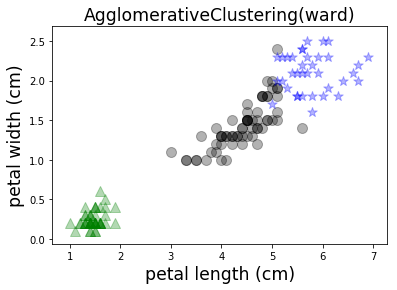

In [63]:
#산포도그리기 
plt.scatter(data_x[labels==0],data_y[labels==0],c='black',alpha=0.3,s=100,marker="o")
plt.scatter(data_x[labels==1],data_y[labels==1],c='green',alpha=0.3,s=100,marker="^")
plt.scatter(data_x[labels==2],data_y[labels==2],c='blue',alpha=0.3,s=100,marker="*")
# 축 라벨과 타이틀 지정 
plt.xlabel(x_label,fontsize='xx-large')
plt.ylabel(y_label,fontsize='xx-large')
plt.title("AgglomerativeClustering(ward)",fontsize='xx-large')

plt.show()

#### 비계층적 클러스터링 
- k-means보다 오차가 적고 클러스터 개수를 미리 정의할 필요하 없음
- 알고리즘이 알아서 자동으로 군집개수를 정해줌 
- 초기상태에 의존하지 않고 많은 계산량이 많아 대규모 데이터에는 적합하지 않음

In [64]:
#학습 
model= cluster.AffinityPropagation().fit(data)

In [65]:
# 학습 라벨 취득 
labels=model.labels_

In [66]:
# 클러스터 수를 알수 없기 때문에 마커는 배열로 가진다
markers=['o','^','*','v','+','x','d','p','s','1','2']
# 데이터 정의 
x_index=2
y_index=3
data_x=data[:,x_index]
data_y=data[:,y_index]
x_label=iris['feature_names'][x_index]
y_label=iris['feature_names'][y_index]

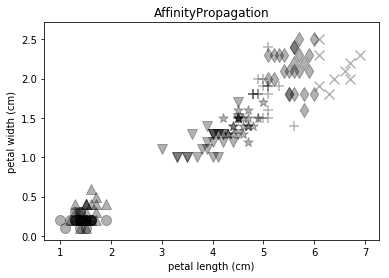

In [84]:
#클러스터마다 산포도를 그리기
for idx in range(labels.max()+1):
    plt.scatter(data_x[labels==idx],data_y[labels==idx],c='black',alpha=0.3,s=100,
               marker=markers[idx])
# 축 라벨과 타이틀 지정 
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title("AffinityPropagation")

plt.show()